# Diaptera wings classification using Topological Data Analysis

G. Vituri [](https://orcid.org/0000-0002-0760-5497) (etc)  
Sergio UraNorthonApril 12, 2025

In September 2021, a significant jump in seismic activity on the island of La Palma (Canary Islands, Spain) signaled the start of a volcanic crisis that still continues at the time of writing. Earthquake data is continually collected and published by the Instituto Geográphico Nacional (IGN). …

In [1]:
using TDAfly, TDAfly.Preprocessing, TDAfly.TDA
using Images
using Plots: heatmap, plot, @layout, scatter
using PersistenceDiagrams

## Introduction

Falar sobre o dataset, TDA, etc.

## Methods

We read all wings into images


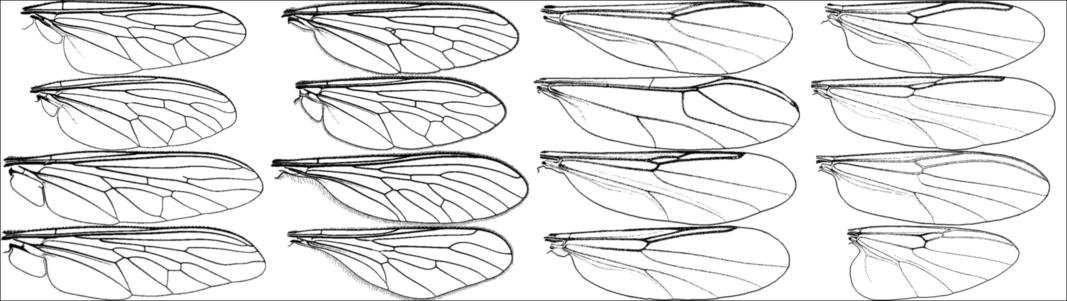

In [2]:
paths = readdir("images/processed", join = true)
species = basename.(paths)
wings = load_wing.(paths)
Xs = map(image_to_r2, wings)

mosaicview(wings, ncol = 4, fillvalue=1)

and then select 750 random points from each image

In [3]:
samples = random_sample.(Xs, 750);

to calculate its persistence diagrams using the Vietoris-Rips filtration etc.

In [4]:
# get only the 1-dimensional PD
rips = rips_pd.(samples, cutoff = 5, threshold = 200) .|> last;

We create the 1-dimensional persistence image for each persistence diagram using 10x10 matrices

In [5]:
PI = PersistenceImage(rips, size = (10, 10))

images = PI.(rips)

function plot_wing_with_pd(rip, image, sample, title)
  l = @layout [a b; c]

  plot(
      plot_pd(rip, persistence = true)
      ,heatmap(image)
      ,scatter(first.(sample), last.(sample))
      ,layout = l
      ,plot_title = title
  )
end;

### Examples

Below are some examples of 1-dimensional barcodes, its persistence image and the original wing that generated it. Note: we are plotting the barcode using the birth and persistence.

In [6]:
i = 1
plot_wing_with_pd(rips[i], images[i], samples[i], species[i])

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip410)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip410)" d="M582.045 928.945 Q578.433 928.945 576.605 932.51 Q574.799 936.051 574.799 943.181 Q574.799 950.287 576.605 953.852 Q578.433 957.394 582.045 957.394 Q585.679 957.394 587.484 953.852 Q589.313 950.287 589.313 943.181 Q589.313 936.051 587.484 932.51 Q585.679 928.945 582.045 928.945 M582.045 925.241 Q587.855 925.241 590.91 929.848 Q593.989 934.431 593.989 943.181 Q593.989 951.908 590.91 956.514 Q587.855 961.097 582.045 961.097 Q576.234 961.097 573.156 956.514 Q570.1 951.908 570.1 943.181 Q570.1 934.431 573.156 929.848 Q576.234 925.241 582.045 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip410)" d="M648.742 956.491 L665.061 956.491 L665.061 960.426 L643.117 960.426 L643.117 956.491 Q645.779 953.736 650.362 949.107 Q654.969 944.454 656.149 943.111 Q658.395 940.588 659.274 938.852 Q660.177 937.093 660.177 935.403 Q660.177 932.649 658.233 930.912 Q656.311 929.176 653.21 929.176 Q651.011 929.176 648.557 929.94 Q646.126 930.704 643.349 932.255 L643.349 927.533 Q646.173 926.399 648.626 925.82 Q651.08 925.241 653.117 925.241 Q658.487 925.241 661.682 927.926 Q664.876 930.612 664.876 935.102 Q664.876 937.232 664.066 939.153 Q663.279 941.051 661.173 943.644 Q660.594 944.315 657.492 947.533 Q654.39 950.727 648.742 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip410)" d="M684.876 928.945 Q681.265 928.945 679.436 932.51 Q677.631 936.051 677.631 943.181 Q677.631 950.287 679.436 953.852 Q681.265 957.394 684.876 957.394 Q688.51 957.394 690.316 953.852 Q692.145 950.287 692.145 943.181 Q692.145 936.051 690.316 932.51 Q688.51 928.945 684.876 928.945 M684.876 925.241 Q690.686 925.241 693.742 929.848 Q696.82 934.431 696.82 943.181 Q696.82 951.908 693.742 956.514 Q690.686 961.097 684.876 961.097 Q679.066 961.097 675.987 956.514 Q672.932 951.908 672.932 943.181 Q672.932 934.431 675.987 929.848 Q679.066 925.241 684.876 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip410)" d="M760.775 941.792 Q764.131 942.51 766.006 944.778 Q767.904 947.047 767.904 950.38 Q767.904 955.496 764.386 958.297 Q760.867 961.097 754.386 961.097 Q752.21 961.097 749.895 960.658 Q747.604 960.241 745.15 959.384 L745.15 954.871 Q747.094 956.005 749.409 956.584 Q751.724 957.162 754.247 957.162 Q758.645 957.162 760.937 955.426 Q763.252 953.69 763.252 950.38 Q763.252 947.324 761.099 945.611 Q758.969 943.875 755.15 943.875 L751.122 943.875 L751.122 940.033 L755.335 940.033 Q758.784 940.033 760.613 938.667 Q762.442 937.278 762.442 934.686 Q762.442 932.024 760.543 930.612 Q758.668 929.176 755.15 929.176 Q753.229 929.176 751.03 929.593 Q748.831 930.01 746.192 930.889 L746.192 926.723 Q748.854 925.982 751.168 925.612 Q753.506 925.241 755.567 925.241 Q760.891 925.241 763.992 927.672 Q767.094 930.079 767.094 934.199 Q767.094 937.07 765.451 939.061 Q763.807 941.028 760.775 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip410)" d="M786.77 928.945 Q783.159 928.945 781.33 932.51 Q779.525 936.051 779.525 943.181 Q779.525 950.287 781.33 953.852 Q783.159 957.394 786.77 957.394 Q790.404 957.394 792.21 953.852 Q794.039 950.287 794.039 943.181 Q794.

In [7]:
i = 5
plot_wing_with_pd(rips[i], images[i], samples[i], species[i])

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip500)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip500)" d="M622.952 928.945 Q619.341 928.945 617.512 932.51 Q615.706 936.051 615.706 943.181 Q615.706 950.287 617.512 953.852 Q619.341 957.394 622.952 957.394 Q626.586 957.394 628.392 953.852 Q630.22 950.287 630.22 943.181 Q630.22 936.051 628.392 932.51 Q626.586 928.945 622.952 928.945 M622.952 925.241 Q628.762 925.241 631.817 929.848 Q634.896 934.431 634.896 943.181 Q634.896 951.908 631.817 956.514 Q628.762 961.097 622.952 961.097 Q617.142 961.097 614.063 956.514 Q611.007 951.908 611.007 943.181 Q611.007 934.431 614.063 929.848 Q617.142 925.241 622.952 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip500)" d="M730.557 956.491 L746.876 956.491 L746.876 960.426 L724.932 960.426 L724.932 956.491 Q727.594 953.736 732.177 949.107 Q736.783 944.454 737.964 943.111 Q740.209 940.588 741.089 938.852 Q741.992 937.093 741.992 935.403 Q741.992 932.649 740.047 930.912 Q738.126 929.176 735.024 929.176 Q732.825 929.176 730.371 929.94 Q727.941 930.704 725.163 932.255 L725.163 927.533 Q727.987 926.399 730.441 925.82 Q732.894 925.241 734.931 925.241 Q740.302 925.241 743.496 927.926 Q746.691 930.612 746.691 935.102 Q746.691 937.232 745.881 939.153 Q745.093 941.051 742.987 943.644 Q742.408 944.315 739.306 947.533 Q736.205 950.727 730.557 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip500)" d="M766.691 928.945 Q763.079 928.945 761.251 932.51 Q759.445 936.051 759.445 943.181 Q759.445 950.287 761.251 953.852 Q763.079 957.394 766.691 957.394 Q770.325 957.394 772.13 953.852 Q773.959 950.287 773.959 943.181 Q773.959 936.051 772.13 932.51 Q770.325 928.945 766.691 928.945 M766.691 925.241 Q772.501 925.241 775.556 929.848 Q778.635 934.431 778.635 943.181 Q778.635 951.908 775.556 956.514 Q772.501 961.097 766.691 961.097 Q760.88 961.097 757.802 956.514 Q754.746 951.908 754.746 943.181 Q754.746 934.431 757.802 929.848 Q760.88 925.241 766.691 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip500)" d="M883.497 941.792 Q886.853 942.51 888.728 944.778 Q890.626 947.047 890.626 950.38 Q890.626 955.496 887.108 958.297 Q883.589 961.097 877.108 961.097 Q874.932 961.097 872.617 960.658 Q870.325 960.241 867.872 959.384 L867.872 954.871 Q869.816 956.005 872.131 956.584 Q874.446 957.162 876.969 957.162 Q881.367 957.162 883.659 955.426 Q885.973 953.69 885.973 950.38 Q885.973 947.324 883.821 945.611 Q881.691 943.875 877.872 943.875 L873.844 943.875 L873.844 940.033 L878.057 940.033 Q881.506 940.033 883.335 938.667 Q885.163 937.278 885.163 934.686 Q885.163 932.024 883.265 930.612 Q881.39 929.176 877.872 929.176 Q875.95 929.176 873.751 929.593 Q871.552 930.01 868.913 930.889 L868.913 926.723 Q871.575 925.982 873.89 925.612 Q876.228 925.241 878.288 925.241 Q883.612 925.241 886.714 927.672 Q889.816 930.079 889.816 934.199 Q889.816 937.07 888.173 939.061 Q886.529 941.028 883.497 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip500)" d="M909.492 928.945 Q905.881 928.945 904.052 932.51 Q902.247 936.051 902.247 943.181 Q902.247 950.287 904.052 953.852 Q905.881 957.394 909.492 957.394 Q913.126 957.394 914.932 953.852 Q916.76 950.287 916.76 943.181 Q9

In [8]:
i = 8
plot_wing_with_pd(rips[i], images[i], samples[i], species[i])

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip590)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip590)" d="M612.219 928.945 Q608.608 928.945 606.78 932.51 Q604.974 936.051 604.974 943.181 Q604.974 950.287 606.78 953.852 Q608.608 957.394 612.219 957.394 Q615.854 957.394 617.659 953.852 Q619.488 950.287 619.488 943.181 Q619.488 936.051 617.659 932.51 Q615.854 928.945 612.219 928.945 M612.219 925.241 Q618.03 925.241 621.085 929.848 Q624.164 934.431 624.164 943.181 Q624.164 951.908 621.085 956.514 Q618.03 961.097 612.219 961.097 Q606.409 961.097 603.331 956.514 Q600.275 951.908 600.275 943.181 Q600.275 934.431 603.331 929.848 Q606.409 925.241 612.219 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip590)" d="M709.092 956.491 L725.411 956.491 L725.411 960.426 L703.467 960.426 L703.467 956.491 Q706.129 953.736 710.712 949.107 Q715.319 944.454 716.499 943.111 Q718.745 940.588 719.624 938.852 Q720.527 937.093 720.527 935.403 Q720.527 932.649 718.583 930.912 Q716.661 929.176 713.559 929.176 Q711.36 929.176 708.907 929.94 Q706.476 930.704 703.698 932.255 L703.698 927.533 Q706.522 926.399 708.976 925.82 Q711.43 925.241 713.467 925.241 Q718.837 925.241 722.032 927.926 Q725.226 930.612 725.226 935.102 Q725.226 937.232 724.416 939.153 Q723.629 941.051 721.522 943.644 Q720.944 944.315 717.842 947.533 Q714.74 950.727 709.092 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip590)" d="M745.226 928.945 Q741.615 928.945 739.786 932.51 Q737.981 936.051 737.981 943.181 Q737.981 950.287 739.786 953.852 Q741.615 957.394 745.226 957.394 Q748.86 957.394 750.666 953.852 Q752.494 950.287 752.494 943.181 Q752.494 936.051 750.666 932.51 Q748.86 928.945 745.226 928.945 M745.226 925.241 Q751.036 925.241 754.092 929.848 Q757.17 934.431 757.17 943.181 Q757.17 951.908 754.092 956.514 Q751.036 961.097 745.226 961.097 Q739.416 961.097 736.337 956.514 Q733.282 951.908 733.282 943.181 Q733.282 934.431 736.337 929.848 Q739.416 925.241 745.226 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip590)" d="M851.3 941.792 Q854.656 942.51 856.531 944.778 Q858.429 947.047 858.429 950.38 Q858.429 955.496 854.911 958.297 Q851.392 961.097 844.911 961.097 Q842.735 961.097 840.42 960.658 Q838.128 960.241 835.675 959.384 L835.675 954.871 Q837.619 956.005 839.934 956.584 Q842.249 957.162 844.772 957.162 Q849.17 957.162 851.462 955.426 Q853.777 953.69 853.777 950.38 Q853.777 947.324 851.624 945.611 Q849.494 943.875 845.675 943.875 L841.647 943.875 L841.647 940.033 L845.86 940.033 Q849.309 940.033 851.138 938.667 Q852.966 937.278 852.966 934.686 Q852.966 932.024 851.068 930.612 Q849.193 929.176 845.675 929.176 Q843.753 929.176 841.554 929.593 Q839.355 930.01 836.716 930.889 L836.716 926.723 Q839.378 925.982 841.693 925.612 Q844.031 925.241 846.091 925.241 Q851.415 925.241 854.517 927.672 Q857.619 930.079 857.619 934.199 Q857.619 937.07 855.976 939.061 Q854.332 941.028 851.3 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip590)" d="M877.295 928.945 Q873.684 928.945 871.855 932.51 Q870.05 936.051 870.05 943.181 Q870.05 950.287 871.855 953.852 Q873.684 957.394 877.295 957.394 Q880.929 957.394 882.735 953.852 Q884.563 950.287 884.563 943.181 Q884.563 936

In [9]:
i = 10
plot_wing_with_pd(rips[i], images[i], samples[i], species[i])

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip680)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip680)" d="M578.63 928.945 Q575.019 928.945 573.19 932.51 Q571.385 936.051 571.385 943.181 Q571.385 950.287 573.19 953.852 Q575.019 957.394 578.63 957.394 Q582.264 957.394 584.07 953.852 Q585.899 950.287 585.899 943.181 Q585.899 936.051 584.07 932.51 Q582.264 928.945 578.63 928.945 M578.63 925.241 Q584.44 925.241 587.496 929.848 Q590.575 934.431 590.575 943.181 Q590.575 951.908 587.496 956.514 Q584.44 961.097 578.63 961.097 Q572.82 961.097 569.741 956.514 Q566.686 951.908 566.686 943.181 Q566.686 934.431 569.741 929.848 Q572.82 925.241 578.63 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip680)" d="M641.913 956.491 L658.233 956.491 L658.233 960.426 L636.288 960.426 L636.288 956.491 Q638.95 953.736 643.534 949.107 Q648.14 944.454 649.321 943.111 Q651.566 940.588 652.446 938.852 Q653.348 937.093 653.348 935.403 Q653.348 932.649 651.404 930.912 Q649.483 929.176 646.381 929.176 Q644.182 929.176 641.728 929.94 Q639.298 930.704 636.52 932.255 L636.52 927.533 Q639.344 926.399 641.798 925.82 Q644.251 925.241 646.288 925.241 Q651.659 925.241 654.853 927.926 Q658.047 930.612 658.047 935.102 Q658.047 937.232 657.237 939.153 Q656.45 941.051 654.344 943.644 Q653.765 944.315 650.663 947.533 Q647.561 950.727 641.913 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip680)" d="M678.047 928.945 Q674.436 928.945 672.608 932.51 Q670.802 936.051 670.802 943.181 Q670.802 950.287 672.608 953.852 Q674.436 957.394 678.047 957.394 Q681.682 957.394 683.487 953.852 Q685.316 950.287 685.316 943.181 Q685.316 936.051 683.487 932.51 Q681.682 928.945 678.047 928.945 M678.047 925.241 Q683.857 925.241 686.913 929.848 Q689.992 934.431 689.992 943.181 Q689.992 951.908 686.913 956.514 Q683.857 961.097 678.047 961.097 Q672.237 961.097 669.158 956.514 Q666.103 951.908 666.103 943.181 Q666.103 934.431 669.158 929.848 Q672.237 925.241 678.047 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip680)" d="M750.532 941.792 Q753.888 942.51 755.763 944.778 Q757.661 947.047 757.661 950.38 Q757.661 955.496 754.143 958.297 Q750.624 961.097 744.143 961.097 Q741.967 961.097 739.652 960.658 Q737.361 960.241 734.907 959.384 L734.907 954.871 Q736.851 956.005 739.166 956.584 Q741.481 957.162 744.004 957.162 Q748.402 957.162 750.694 955.426 Q753.009 953.69 753.009 950.38 Q753.009 947.324 750.856 945.611 Q748.726 943.875 744.907 943.875 L740.879 943.875 L740.879 940.033 L745.092 940.033 Q748.541 940.033 750.37 938.667 Q752.198 937.278 752.198 934.686 Q752.198 932.024 750.3 930.612 Q748.425 929.176 744.907 929.176 Q742.986 929.176 740.786 929.593 Q738.587 930.01 735.949 930.889 L735.949 926.723 Q738.611 925.982 740.925 925.612 Q743.263 925.241 745.323 925.241 Q750.648 925.241 753.749 927.672 Q756.851 930.079 756.851 934.199 Q756.851 937.07 755.208 939.061 Q753.564 941.028 750.532 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip680)" d="M776.527 928.945 Q772.916 928.945 771.087 932.51 Q769.282 936.051 769.282 943.181 Q769.282 950.287 771.087 953.852 Q772.916 957.394 776.527 957.394 Q780.161 957.394 781.967 953.852 Q783.795 950.287 783.795 943.181 

In [10]:
i = 15
plot_wing_with_pd(rips[i], images[i], samples[i], species[i])

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip770)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip770)" d="M574.789 928.945 Q571.178 928.945 569.349 932.51 Q567.543 936.051 567.543 943.181 Q567.543 950.287 569.349 953.852 Q571.178 957.394 574.789 957.394 Q578.423 957.394 580.228 953.852 Q582.057 950.287 582.057 943.181 Q582.057 936.051 580.228 932.51 Q578.423 928.945 574.789 928.945 M574.789 925.241 Q580.599 925.241 583.654 929.848 Q586.733 934.431 586.733 943.181 Q586.733 951.908 583.654 956.514 Q580.599 961.097 574.789 961.097 Q568.978 961.097 565.9 956.514 Q562.844 951.908 562.844 943.181 Q562.844 934.431 565.9 929.848 Q568.978 925.241 574.789 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip770)" d="M634.23 956.491 L650.55 956.491 L650.55 960.426 L628.605 960.426 L628.605 956.491 Q631.267 953.736 635.851 949.107 Q640.457 944.454 641.638 943.111 Q643.883 940.588 644.763 938.852 Q645.665 937.093 645.665 935.403 Q645.665 932.649 643.721 930.912 Q641.8 929.176 638.698 929.176 Q636.499 929.176 634.045 929.94 Q631.614 930.704 628.837 932.255 L628.837 927.533 Q631.661 926.399 634.114 925.82 Q636.568 925.241 638.605 925.241 Q643.976 925.241 647.17 927.926 Q650.364 930.612 650.364 935.102 Q650.364 937.232 649.554 939.153 Q648.767 941.051 646.661 943.644 Q646.082 944.315 642.98 947.533 Q639.878 950.727 634.23 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip770)" d="M670.364 928.945 Q666.753 928.945 664.924 932.51 Q663.119 936.051 663.119 943.181 Q663.119 950.287 664.924 953.852 Q666.753 957.394 670.364 957.394 Q673.999 957.394 675.804 953.852 Q677.633 950.287 677.633 943.181 Q677.633 936.051 675.804 932.51 Q673.999 928.945 670.364 928.945 M670.364 925.241 Q676.174 925.241 679.23 929.848 Q682.309 934.431 682.309 943.181 Q682.309 951.908 679.23 956.514 Q676.174 961.097 670.364 961.097 Q664.554 961.097 661.475 956.514 Q658.42 951.908 658.42 943.181 Q658.42 934.431 661.475 929.848 Q664.554 925.241 670.364 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip770)" d="M739.007 941.792 Q742.364 942.51 744.239 944.778 Q746.137 947.047 746.137 950.38 Q746.137 955.496 742.618 958.297 Q739.1 961.097 732.618 961.097 Q730.442 961.097 728.128 960.658 Q725.836 960.241 723.382 959.384 L723.382 954.871 Q725.327 956.005 727.641 956.584 Q729.956 957.162 732.479 957.162 Q736.878 957.162 739.169 955.426 Q741.484 953.69 741.484 950.38 Q741.484 947.324 739.331 945.611 Q737.202 943.875 733.382 943.875 L729.354 943.875 L729.354 940.033 L733.567 940.033 Q737.016 940.033 738.845 938.667 Q740.674 937.278 740.674 934.686 Q740.674 932.024 738.776 930.612 Q736.901 929.176 733.382 929.176 Q731.461 929.176 729.262 929.593 Q727.063 930.01 724.424 930.889 L724.424 926.723 Q727.086 925.982 729.401 925.612 Q731.739 925.241 733.799 925.241 Q739.123 925.241 742.225 927.672 Q745.327 930.079 745.327 934.199 Q745.327 937.07 743.683 939.061 Q742.04 941.028 739.007 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip770)" d="M765.002 928.945 Q761.391 928.945 759.563 932.51 Q757.757 936.051 757.757 943.181 Q757.757 950.287 759.563 953.852 Q761.391 957.394 765.002 957.394 Q768.637 957.394 770.442 953.852 Q772.271 950.287 772.271 943.18

In [11]:
i = 16
plot_wing_with_pd(rips[i], images[i], samples[i], species[i])

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip860)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip860)" d="M591.044 956.491 L607.363 956.491 L607.363 960.426 L585.419 960.426 L585.419 956.491 Q588.081 953.736 592.664 949.107 Q597.271 944.454 598.451 943.111 Q600.697 940.588 601.576 938.852 Q602.479 937.093 602.479 935.403 Q602.479 932.649 600.535 930.912 Q598.614 929.176 595.512 929.176 Q593.313 929.176 590.859 929.94 Q588.428 930.704 585.651 932.255 L585.651 927.533 Q588.475 926.399 590.928 925.82 Q593.382 925.241 595.419 925.241 Q600.789 925.241 603.984 927.926 Q607.178 930.612 607.178 935.102 Q607.178 937.232 606.368 939.153 Q605.581 941.051 603.475 943.644 Q602.896 944.315 599.794 947.533 Q596.692 950.727 591.044 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip860)" d="M627.178 928.945 Q623.567 928.945 621.738 932.51 Q619.933 936.051 619.933 943.181 Q619.933 950.287 621.738 953.852 Q623.567 957.394 627.178 957.394 Q630.812 957.394 632.618 953.852 Q634.447 950.287 634.447 943.181 Q634.447 936.051 632.618 932.51 Q630.812 928.945 627.178 928.945 M627.178 925.241 Q632.988 925.241 636.044 929.848 Q639.123 934.431 639.123 943.181 Q639.123 951.908 636.044 956.514 Q632.988 961.097 627.178 961.097 Q621.368 961.097 618.289 956.514 Q615.234 951.908 615.234 943.181 Q615.234 934.431 618.289 929.848 Q621.368 925.241 627.178 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip860)" d="M773.986 928.945 Q770.375 928.945 768.546 932.51 Q766.741 936.051 766.741 943.181 Q766.741 950.287 768.546 953.852 Q770.375 957.394 773.986 957.394 Q777.62 957.394 779.426 953.852 Q781.254 950.287 781.254 943.181 Q781.254 936.051 779.426 932.51 Q777.62 928.945 773.986 928.945 M773.986 925.241 Q779.796 925.241 782.852 929.848 Q785.93 934.431 785.93 943.181 Q785.93 951.908 782.852 956.514 Q779.796 961.097 773.986 961.097 Q768.176 961.097 765.097 956.514 Q762.042 951.908 762.042 943.181 Q762.042 934.431 765.097 929.848 Q768.176 925.241 773.986 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip860)" d="M890.134 941.283 Q886.986 941.283 885.134 943.436 Q883.305 945.588 883.305 949.338 Q883.305 953.065 885.134 955.241 Q886.986 957.394 890.134 957.394 Q893.282 957.394 895.111 955.241 Q896.963 953.065 896.963 949.338 Q896.963 945.588 895.111 943.436 Q893.282 941.283 890.134 941.283 M899.416 926.63 L899.416 930.889 Q897.657 930.056 895.852 929.616 Q894.069 929.176 892.31 929.176 Q887.68 929.176 885.227 932.301 Q882.796 935.426 882.449 941.746 Q883.815 939.732 885.875 938.667 Q887.935 937.579 890.412 937.579 Q895.62 937.579 898.629 940.75 Q901.662 943.898 901.662 949.338 Q901.662 954.662 898.514 957.88 Q895.366 961.097 890.134 961.097 Q884.139 961.097 880.967 956.514 Q877.796 951.908 877.796 943.181 Q877.796 934.986 881.685 930.125 Q885.574 925.241 892.125 925.241 Q893.884 925.241 895.666 925.588 Q897.472 925.936 899.416 926.63 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip860)" d="M919.717 928.945 Q916.106 928.945 914.277 932.51 Q912.472 936.051 912.472 943.181 Q912.472 950.287 914.277 953.852 Q916.106 957.394 919.717 957.394 Q923.352 957.394 925.157 953.852 Q926.986 950.287 926.986 943.181 Q926.986 936.051 925.157 932.51 Q923.352 928.94